##### En esta tercera parte vamos a trabajar con los ratings. 

In [1]:
import pandas as pd
import numpy as np

cargamos el archivo que generamos como producto final del cuaderno 'primera_parte.ipynb'

In [2]:
revi = pd.read_csv('reviews.csv')

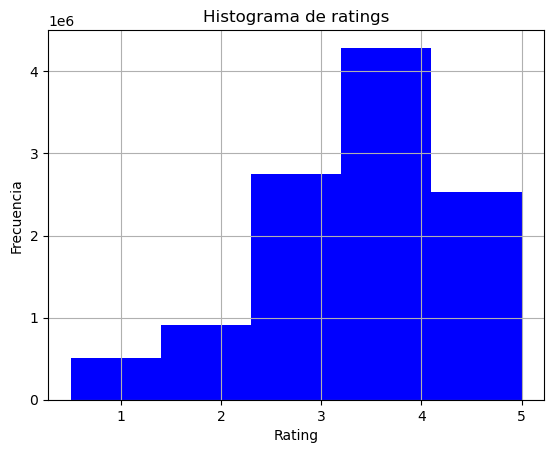

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# plot a histogram of the data
revi['rating'].hist(bins=5, color='blue')

# add labels and title
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.title('Histograma de ratings')

# display the plot
plt.show()


Se observa que los ratings tienen un sesgo a la derecha. De lo que se infiere que la mayoría de los usuarios tienden a calificar más positiva que negativamente la mayoría de las películas. 

Veamos si los usuarios de las cuatro plataformas se comportan de manera similar

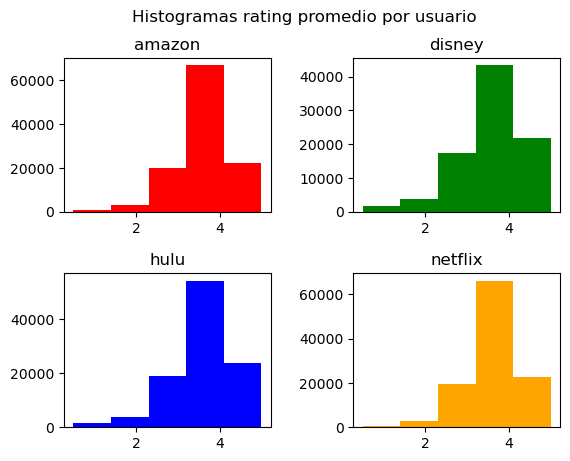

In [27]:
# Creamos un data frame para cada plataforma filtrando por 'movieId' con la primera letra de cada plataforma

amazon = revi[revi['movieId'].str[0] == 'a']
disney = revi[revi['movieId'].str[0] == 'd']
hulu = revi[revi['movieId'].str[0] == 'h']
netflix = revi[revi['movieId'].str[0] == 'n']

# Agrupamos por 'userId' para cada plataforma y sacamos el promedio de rating otorgado por usuario para tener una escala común

amazon_prom = amazon.groupby('userId')['rating'].mean()
disney_prom = disney.groupby('userId')['rating'].mean()
hulu_prom = hulu.groupby('userId')['rating'].mean()
netflix_prom = netflix.groupby('userId')['rating'].mean()

# Graficamos los histogramas para cada plataforma

import matplotlib.pyplot as plt

# Creamos figura con grid 2x2 de subplots
fig, axs = plt.subplots(2, 2)

# ploteamos los histogramas
axs[0, 0].hist(amazon_prom, bins=5, color='red')
axs[0, 0].set_title('amazon')
axs[0, 1].hist(disney_prom, bins=5, color='green')
axs[0, 1].set_title('disney')
axs[1, 0].hist(hulu_prom, bins=5, color='blue')
axs[1, 0].set_title('hulu')
axs[1, 1].hist(netflix_prom, bins=5, color='orange')
axs[1, 1].set_title('netflix')

# Título general
fig.suptitle('Histogramas rating promedio por usuario')

# Ajustamos espacio entre subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# desplegamos gráficas
plt.show()


No hay gran diferencia entre los usuarios de cada plataforma y los ratings de estos. En la escala de 0  5, los ratings con valor de 4 son los preponderantes. La mayoría de los ratings caen en el rango 3,5 incluyente. 

Agrupemos por película y obtengamos el promedio de rating para cada una según su plataforma. 

In [30]:
movie_avg_rating = revi.groupby('movieId')['rating'].mean()

In [44]:
movie_avg_rating.head(2)

movieId
as1     3.467131
as10    3.437378
Name: rating, dtype: float64

In [51]:
((movie_avg_rating >= 3.37652266) & (movie_avg_rating < 3.41512159)).sum()

155

Vamos a grafícar el histograma del promedio de rating

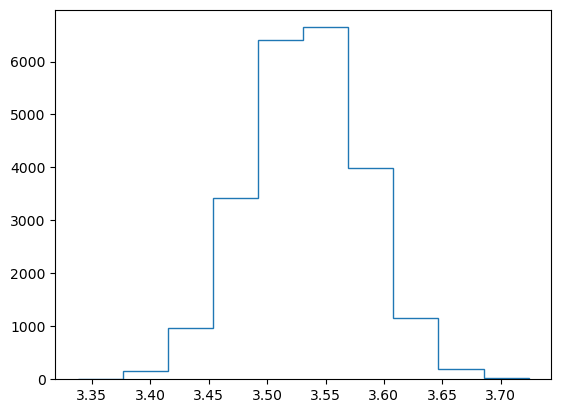

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

counts, bins = np.histogram(movie_avg_rating)
plt.stairs(counts, bins)

Como se puede observar la escala de ratings de 0 a 5 no tiene mucho sentido una vez que se han sacado los promedios: ahora todos los valores caen dentro de una escala de 3.3 a 3.8

In [53]:
print('counts', counts)
print('bins', bins)

counts [  14  155  976 3428 6409 6647 3992 1166  185   26]
bins [3.33792373 3.37652266 3.41512159 3.45372052 3.49231945 3.53091839
 3.56951732 3.60811625 3.64671518 3.68531411 3.72391304]


Vamos a crear un nuevo dataframe al que llamaremos 'star' con el pandas data series movie_avg_rating.
A este dataframe le agregaremos una nueva columna a la que le asignaremos valores de 1 a 10 siguiendo como criterio los bordes de los bins de histograma. 
Así tendremos una nueva escala de ratings que nos ayudará a distinguir de manera más significativa y amigable entre películas buenas y malas. 

In [58]:
# creamos el dataframe de la serie de pandas
df = pd.DataFrame(movie_avg_rating, columns=['rating'])

# defininimos las condiciones y valores para la nueva columna
conditions = [(df['rating'] < 3.37652266),
              (df['rating'] < 3.41512159),
              (df['rating'] < 3.45372052),
              (df['rating'] < 3.49231945),
              (df['rating'] < 3.53091839),
              (df['rating'] < 3.56951732),
              (df['rating'] < 3.60811625),
              (df['rating'] < 3.64671518),
              (df['rating'] < 3.68531411),
              (df['rating'] >= 3.68531411)]
values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# creamos la nueva columna usando las condiciones y valores
df['stars'] = pd.Series(np.select(conditions, values), index=df.index)

# imprimimos dataframe
star = df.copy()
print(star)


           rating  stars
movieId                 
as1      3.467131      4
as10     3.437378      3
as100    3.610723      8
as1000   3.557054      6
as1001   3.585288      7
...           ...    ...
ns995    3.518018      5
ns996    3.628049      8
ns997    3.529536      5
ns998    3.580745      7
ns999    3.495816      5

[22998 rows x 2 columns]


Quitamos la columna rating y nos quedamos con stars

In [59]:
star.drop(['rating'], axis=1, inplace=True)
star.head(1)    

,stars
movieId,
as1,4


Creamos dataframe 'plata' con el el archivo 'plata.csv'

In [60]:
plata = pd.read_csv('plata.csv')
plata.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,classification,duration_int,duration_type,listed_in,description
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,G,113.0,min,"comedy, drama",a small fishing village must procure a local d...


Hacemos un merge usando la columna 'show_id' de plata y el index de star

In [62]:
plata = pd.merge(plata, star, left_on='show_id', right_index=True)

In [67]:
plata.head()

,show_id,type,title,director,cast,country,date_added,release_year,classification,duration_int,duration_type,listed_in,description,stars
0,as1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,G,113.0,min,"comedy, drama",a small fishing village must procure a local d...,4
1,as2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,110.0,min,"drama, international",a metro family decides to fight a cyber crimin...,6
2,as3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,G,74.0,min,"action, drama, suspense",after a man discovers his wife is cheating on ...,5
3,as4,movie,pink: staying true,sonia anderson,"interviews with: pink, adele, beyoncé, britney...",united states,2021-03-30,2014,G,69.0,min,documentary,"pink breaks the mold once again, bringing her ...",6
4,as5,movie,monster maker,giles foster,"harry dean stanton, kieran o'brien, george cos...",united kingdom,2021-03-30,1989,G,45.0,min,"drama, fantasy",teenage matt banting wants to work with a famo...,4


Hacemos una pequeña revisión para ver si se corresponden los valores cotejando contra lo desplegados en el anterior head()

In [68]:
print(star.loc['as2'])
print(star.loc['as5'])

stars    6
Name: as2, dtype: int32
stars    4
Name: as5, dtype: int32


In [69]:
stars_missing_values = plata['stars'].isnull().sum()
print(stars_missing_values)

0


No hay valores faltantes en la columna stars añadida a plata. Hagamos otra pequeña revisión aleatoria

In [74]:
print(plata['show_id'].iloc[1250], plata['stars'].iloc[1250])
print(plata['show_id'].iloc[9000], plata['stars'].iloc[9000])
print(plata['show_id'].iloc[13001], plata['stars'].iloc[13001])


as1251 4
as9001 4
hs1884 6


In [75]:
print(star.loc['as1251'])
print(star.loc['as9001'])
print(star.loc['hs1884'])

stars    4
Name: as1251, dtype: int32
stars    4
Name: as9001, dtype: int32
stars    6
Name: hs1884, dtype: int32


Exportamos plata a csv como 'plata_stars.csv', y terminamos esta tercera parte. 

In [77]:
plata.to_csv('plata_stars.csv', index=False)